# Designing Neural Network to classify iris dataset

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import pandas as pd
import numpy as np

In [2]:
iris = datasets.load_iris()
X = iris.data[:100,:2]
y = iris.target[:100]
flower = pd.DataFrame(X,columns=['length', 'width'])
flower['type']=y

<AxesSubplot: xlabel='length', ylabel='width'>

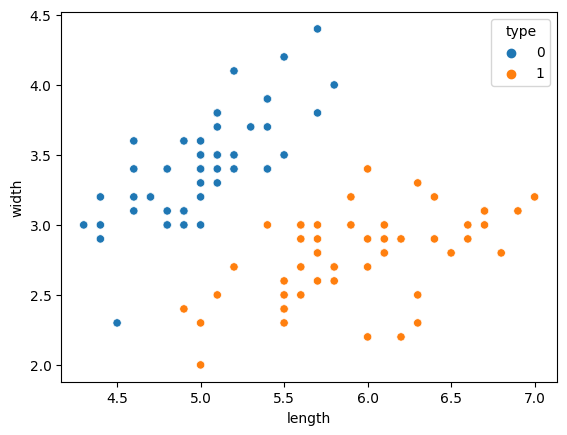

In [3]:
sns.scatterplot(data = flower, x='length', y = 'width', hue = 'type')

In [4]:
flower['setosa']= np.where(flower['type'] == 0, 1, 0)
flower['versicolor']= np.where(flower['type'] == 1, 1, 0)
del flower['type']

In [5]:
w00 = np.random.normal(0, 1)
w01 = np.random.normal(0, 1)
w02 = np.random.normal(0, 1)
w03 = np.random.normal(0, 1)
w10 = np.random.normal(0, 1)
w20 = np.random.normal(0, 1)
w30 = np.random.normal(0, 1)
w40 = np.random.normal(0, 1)
print("Weights for nn are:\n w00 = " + str(w00) + "\n w01 = "
      + str(w01) + "\n w02 = " + str(w02) + "\n w03 = " + str(w03) + "\n w10 = " + str(w10) + "\n w20 = "
      + str(w20) + "\n w30 = " + str(w30) + "\n w40 = " + str(w40))

Weights for nn are:
 w00 = 0.6812132132258841
 w01 = -0.8925350818331435
 w02 = -1.5425699870747263
 w03 = -0.6083084993356046
 w10 = 1.3769885870912952
 w20 = 1.204410185988181
 w30 = 1.0729451739451408
 w40 = -0.08178812441914773


In [6]:
class BasicNN(nn.Module):
    def __init__(self):
        super().__init__()

        self.w00 = nn.Parameter(torch.tensor(w00), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(w01), requires_grad=False)
        self.w02 = nn.Parameter(torch.tensor(w02), requires_grad=False)
        self.w03 = nn.Parameter(torch.tensor(w03), requires_grad=False)

        self.w10 = nn.Parameter(torch.tensor(w10), requires_grad=False)
        self.w20 = nn.Parameter(torch.tensor(w20), requires_grad=False)
        self.w30 = nn.Parameter(torch.tensor(w30), requires_grad=False)
        self.w40 = nn.Parameter(torch.tensor(w40), requires_grad=False)

        self.b00 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.b01 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.b20 = nn.Parameter(torch.tensor(0.0), requires_grad=False)


    def forward(self, input1, input2):

        inputs_to_top_relu = input1 * self.w00 + input2 * self.w10 + self.b00
        inputs_to_bottom_relu = input1 * self.w01 + input2 * self.w20 + self.b10

        top_relu_output = F.relu(inputs_to_top_relu)
        bottom_relu_output = F.relu(inputs_to_bottom_relu)

        input_to_top_final_relu = top_relu_output * self.w02 + bottom_relu_output * self.w30 + self.b01
        input_to_bottom_final_relu = top_relu_output * self.w03 + bottom_relu_output * self.w40 + self.b20

        output1 = F.relu(input_to_top_final_relu)
        output2 = F.relu(input_to_bottom_final_relu)

        inputs = torch.tensor([output1, output2])
        outputs = torch.softmax(inputs, dim=-1)
        output1 = outputs[0]
        output1 = outputs[1]
        
        return output1, output2


In [7]:
length = torch.rand(20)*7
width = torch.rand(20)*4.5

In [8]:
model = BasicNN()

In [9]:
setosa, versicolor = model(length, width)

ValueError: only one element tensors can be converted to Python scalars

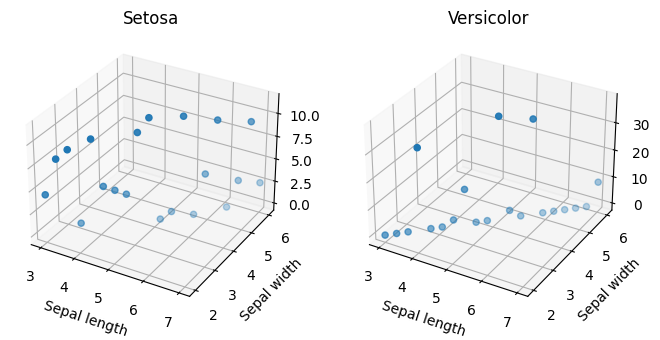

In [50]:
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(121, projection = '3d')
ax1.set_xlabel('Sepal length')
ax1.set_ylabel('Sepal width')
ax1.set_title('Setosa')
ax1.scatter(input1, input2, setosa)


ax2 = fig.add_subplot(122, projection = '3d')
ax2.set_xlabel('Sepal length')
ax2.set_ylabel('Sepal width')
ax2.set_title('Versicolor')
ax2.scatter(input1, input2, versicolor)


plt.show()

In [75]:
class BasicNN_train(nn.Module):
    def __init__(self):
        super().__init__()

        self.w00 = nn.Parameter(torch.tensor(np.random.normal(0, 1)), requires_grad=True)
        self.w01 = nn.Parameter(torch.tensor(np.random.normal(0, 1)), requires_grad=True)
        self.w02 = nn.Parameter(torch.tensor(np.random.normal(0, 1)), requires_grad=True)
        self.w03 = nn.Parameter(torch.tensor(np.random.normal(0, 1)), requires_grad=True)

        self.w10 = nn.Parameter(torch.tensor(np.random.normal(0, 1)), requires_grad=True)
        self.w20 = nn.Parameter(torch.tensor(np.random.normal(0, 1)), requires_grad=True)
        self.w30 = nn.Parameter(torch.tensor(np.random.normal(0, 1)), requires_grad=True)
        self.w40 = nn.Parameter(torch.tensor(np.random.normal(0, 1)), requires_grad=True)

        self.b00 = nn.Parameter(torch.tensor(0.0), requires_grad=True)
        self.b01 = nn.Parameter(torch.tensor(0.0), requires_grad=True)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=True)
        self.b20 = nn.Parameter(torch.tensor(0.0), requires_grad=True)


    def forward(self, input1, input2):

        inputs_to_top_relu = input1 * self.w00 + input2 * self.w10 + self.b00
        inputs_to_bottom_relu = input1 * self.w01 + input2 * self.w20 + self.b10

        top_relu_output = F.relu(inputs_to_top_relu)
        bottom_relu_output = F.relu(inputs_to_bottom_relu)

        input_to_top_final_relu = top_relu_output * self.w02 + bottom_relu_output * self.w30 + self.b01
        input_to_bottom_final_relu = top_relu_output * self.w03 + bottom_relu_output * self.w40 + self.b20

        output1 = F.relu(input_to_top_final_relu)
        output2 = F.relu(input_to_bottom_final_relu)
        
        inputs = torch.tensor([output1, output2])
        outputs = torch.softmax(inputs, dim=-1)
        output1 = outputs[0]
        output1 = outputs[1]

        return output1, output2

In [86]:
input1 = torch.tensor(flower.iloc[:,0].tolist())
input2 = torch.tensor(flower.iloc[:,1].tolist())
output1_label = torch.tensor(flower.iloc[:,2].tolist())
output2_label = torch.tensor(flower.iloc[:,3].tolist())

In [77]:
model = BasicNN_train()

optimizer = SGD(model.parameters(), lr=0.1)

print("Final bias 1 before optimization: " + str(model.b01.data) + "\n")
print("Final bias 2 before optimization: " + str(model.b20.data) + "\n")

Final bias 1 before optimization: tensor(0.)

Final bias 2 before optimization: tensor(0.)



In [87]:
for epoch in range(100):
    
    total_loss = 0
    for iteration in range(len(length)):
        input1_i = input1[iteration]
        input2_i = input12[iteration]
        output1_label_i = output1_label[iteration]
        output2_label_i = output2_label[iteration]
        
        output1_i, output2_i = model(input1_i, input2_i)
        loss = (output1_i - output1_label_i)**2+(output2_i - output2_label_i)**2
        
        loss.backward()
        
        total_loss += float(loss)
        
    if (total_loss < 0.0001):
        print("Num steps: " + str(epoch))
        break
        
    optimizer.step()
    optimizer.zero_grad()
    print("Step: " + str(epoch) + "\n")

Final bias 1: tensor(0.)

Final bias 2: tensor(0.)

Final bias 1: tensor(0.)

Final bias 2: tensor(0.)

Final bias 1: tensor(0.)

Final bias 2: tensor(0.)

Final bias 1: tensor(0.)

Final bias 2: tensor(0.)

Final bias 1: tensor(0.)

Final bias 2: tensor(0.)

Final bias 1: tensor(0.)

Final bias 2: tensor(0.)

Final bias 1: tensor(0.)

Final bias 2: tensor(0.)

Final bias 1: tensor(0.)

Final bias 2: tensor(0.)

Final bias 1: tensor(0.)

Final bias 2: tensor(0.)

Final bias 1: tensor(0.)

Final bias 2: tensor(0.)

Final bias 1: tensor(0.)

Final bias 2: tensor(0.)

Final bias 1: tensor(0.)

Final bias 2: tensor(0.)

Final bias 1: tensor(0.)

Final bias 2: tensor(0.)

Final bias 1: tensor(0.)

Final bias 2: tensor(0.)

Final bias 1: tensor(0.)

Final bias 2: tensor(0.)

Final bias 1: tensor(0.)

Final bias 2: tensor(0.)

Final bias 1: tensor(0.)

Final bias 2: tensor(0.)

Final bias 1: tensor(0.)

Final bias 2: tensor(0.)

Final bias 1: tensor(0.)

Final bias 2: tensor(0.)

Final bias 1

In [88]:
print("Total loss: " + str(total_loss))
print("Final bias 1 after optimization: " + str(model.b01.data) + "\n")
print("Final bias 2 after optimization: " + str(model.b20.data) + "\n")

Total loss: 75.0
Final bias 1 after optimization: tensor(0.)

Final bias 2 after optimization: tensor(0.)



In [90]:
model.b00.data

tensor(0.)

In [91]:
setosa, versicolor = model(length, width)

ValueError: only one element tensors can be converted to Python scalars

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(121, projection = '3d')
ax1.set_xlabel('Sepal length')
ax1.set_ylabel('Sepal width')
ax1.set_title('Setosa')
ax1.scatter(input1, input2, setosa)


ax2 = fig.add_subplot(122, projection = '3d')
ax2.set_xlabel('Sepal length')
ax2.set_ylabel('Sepal width')
ax2.set_title('Versicolor')
ax2.scatter(input1, input2, versicolor)


plt.show()